In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import collections
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
# import os
# os.listdir()

In [4]:
df=pd.read_csv('Synthetic_data_final.csv')
df.head()

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,url*peace+images,url*blipverts,url*tkaine+kats,url*labyrinth,url*advertising+blipverts,url*images+oso,url*area51+corridor,url*ran+gifs,url*express-scripts.com,url*off,url*cnet,url*time+1998,url*josefina3,url*truluck.com,url*clawnext+gif,url*autopen.com,url*tvgen.com,url*pixs,url*heartland+5309,url*meadows+9196,url*blue,url*ad+gif,url*area51,url*www.internauts.ca,url*afn.org,url*ran.org,url*shareware.com,url*baons+images,url*area51+labyrinth,url*pics,...,alt*to+visit,alt*rank+my,alt*from,alt*page,alt*graphic,alt*like+mine,alt*email+me,alt*visit,alt*free,alt*the+kat,alt*award,alt*services,alt*about,alt*for,alt*here+to,alt*network,alt*you,alt*logo,alt*home,alt*kat,caption*and,caption*home+page,caption*click+here,caption*the,caption*pratchett,caption*here+for,caption*site,caption*page,caption*to,caption*of,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,output_nonad
0,0.231385,0.375911,0.050007,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.129897,0.791566,0.166108,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.094078,0.503152,0.146127,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.134375,0.791566,0.159498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.134375,0.791566,0.159498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
datapd=df[['height','width','aratio','local','output_nonad']]
datapd.describe()

,height,width,aratio,local,output_nonad
count,4107.000000,4107.000000,4107.000000,4107.000000,4107.000000
mean,0.142475,0.454755,0.099448,0.781105,0.666667
std,0.067814,0.174634,0.075806,0.413547,0.471462
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.098556,0.333497,0.055374,1.000000,0.000000
50%,0.134375,0.392266,0.079613,1.000000,1.000000
75%,0.164224,0.504364,0.138437,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

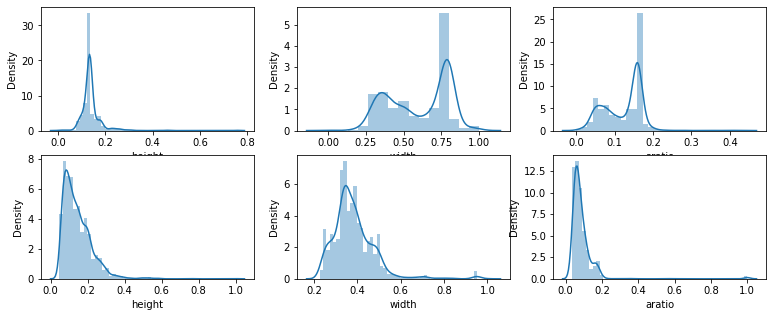

In [6]:

fig,ax=plt.subplots(nrows=2,ncols=3)
fig.set_figheight(5)
fig.set_figwidth(13)
h=datapd['height']
sns.distplot(h[datapd['output_nonad']==0],ax=ax[0,0])
sns.distplot(h[datapd['output_nonad']==1],ax=ax[1,0])
h=datapd['width']
sns.distplot(h[datapd['output_nonad']==0],ax=ax[0,1])
sns.distplot(h[datapd['output_nonad']==1],ax=ax[1,1])
h=datapd['aratio']
sns.distplot(h[datapd['output_nonad']==0],ax=ax[0,2])
sns.distplot(h[datapd['output_nonad']==1],ax=ax[1,2])


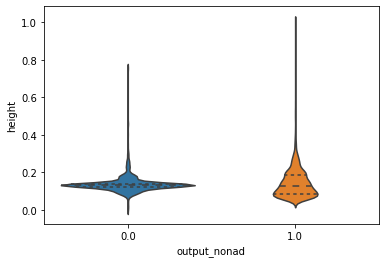

In [7]:

ax = sns.violinplot(x="output_nonad", y="height",data=datapd,split=True,inner="quart")

In [8]:
dddd=datapd.drop('height',axis=1)

In [9]:
dddd.head()

,width,aratio,local,output_nonad
0,0.375911,0.050007,1.0,0.0
1,0.791566,0.166108,1.0,0.0
2,0.503152,0.146127,1.0,0.0
3,0.791566,0.159498,1.0,0.0
4,0.791566,0.159498,1.0,0.0


In [ ]:
# print("                                              add/non-ad  vs   Features")
# fig,ax=plt.subplots(nrows=4,ncols=1)
# fig.set_figheight(15)
# fig.set_figwidth(18)
# sns.stripplot(y='output_nonad',x='height',data=datapd,ax=ax[0])
# sns.stripplot(y='output_nonad',x='width',data=datapd,ax=ax[1])
# sns.stripplot(y='output_nonad',x='aratio',data=datapd,ax=ax[2])
# sns.stripplot(y='output_nonad',x='local',data=datapd,ax=ax[3])
# plt.show()

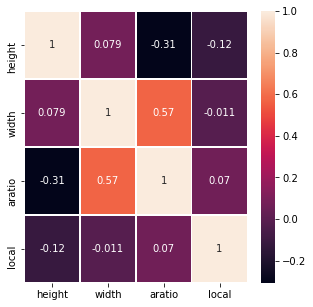

In [ ]:
columns_for_visualization = list()
columns_for_visualization=['height','width','aratio','local']
corr=datapd[columns_for_visualization].corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,linewidths=.5, ax=ax)

In [10]:
da=dddd.values
X=da[:,:-1]
y=da[:,-1]


xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=80)

In [11]:

def fit_models(classifiers,xtrain,ytrain):
    """This function fit multiple models by sklearn and return the dictionary with values as  objects of models"""
    models=collections.OrderedDict()
    for constructor in classifiers:
        obj=constructor()
        obj.fit(xtrain,ytrain)
        models[str(constructor).split(':')[0]]=obj
    return models

def classification_multi_report(ytest,models_array):
    """This function generate classification accuracy report for given input model objects"""
    for i in models_array:
        print('__________________________________________________')
        print('the model - '+str(i))
        print(classification_report(ytest,models_array[i].predict(xtest)))
def cross_Fucntion(models,cv):
    """This function return cross validated accuray and the variance of given input model obejects"""
    accuracy={}
    for model in models:
        cross_val_array=cross_val_score(models[model],xtrain,ytrain,scoring='accuracy',cv=cv)
        accuracy[model]=[np.mean(cross_val_array),np.std(cross_val_array)]
    return accuracy

def multi_grid_search(param_grid_array,estimator_list,x,y):
    """This function calculate the grid search parameters and accuracy  for given input modles and return dictionary with each tupple containing accuracy and best parameters"""
    d={}
    count=0
    for i in estimator_list:
        gc=GridSearchCV(estimator=estimator_list[i],param_grid=param_grid_array[count],scoring ='accuracy',cv=5).fit(x,y)
        d[i]=(gc.best_params_,gc.best_score_)
        count+=1
    return d

## Classification  Report

>The classification report visualizer displays the precision, recall, F1, and support scores for the model. ... Visual classification reports are used to compare classification models to select models that are “redder”, e.g. have stronger classification metrics or that are more balanced.

In [12]:
classifiers=[ SVC,KNeighborsClassifier, RandomForestClassifier, GradientBoostingClassifier,LogisticRegression,DecisionTreeClassifier]

model_list=fit_models(classifiers,xtrain,ytrain)

classification_multi_report(ytest,model_list)

__________________________________________________
the model - <class 'sklearn.svm._classes.SVC'>
              precision    recall  f1-score   support

         0.0       0.96      0.53      0.68       409
         1.0       0.81      0.99      0.89       824

    accuracy                           0.84      1233
   macro avg       0.88      0.76      0.79      1233
weighted avg       0.86      0.84      0.82      1233

__________________________________________________
the model - <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       409
         1.0       0.92      0.93      0.92       824

    accuracy                           0.90      1233
   macro avg       0.89      0.88      0.88      1233
weighted avg       0.90      0.90      0.90      1233

__________________________________________________
the model - <class 'sklearn.ensemble._forest.RandomForestClassifier'>

In [ ]:
obj=cross_Fucntion(model_list,cv=20)
for model in obj:
    print('the model -'+str(model)+'has \n || crosss validated accuracy as  -> '+str(obj[model][0])+' | variance - '+str(obj[model][1])+' ||' )
    print('______________________________________________________________________________________________________________')

the model -<class 'sklearn.svm._classes.SVC'>has 
 || crosss validated accuracy as  -> 0.8309124902874903 | variance - 0.025552929527984665 ||
______________________________________________________________________________________________________________
the model -<class 'sklearn.neighbors._classification.KNeighborsClassifier'>has 
 || crosss validated accuracy as  -> 0.8900641025641025 | variance - 0.02488099509802605 ||
______________________________________________________________________________________________________________
the model -<class 'sklearn.ensemble._forest.RandomForestClassifier'>has 
 || crosss validated accuracy as  -> 0.907432498057498 | variance - 0.019884951032696455 ||
______________________________________________________________________________________________________________
the model -<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>has 
 || crosss validated accuracy as  -> 0.8799363830613831 | variance - 0.023476159016257204 ||
_____________________

In [ ]:

param_grid_svm=[
    {
        'kernel':['linear'],'random_state':[0]
    },
     {
        'kernel':['rbf'],'random_state':[0]
     },
    
    {
        'kernel':['poly'],'degree':[1,2,3,4],'random_state':[0]
    }
]

param_grid_knn=[

    {   
        'n_neighbors':[1,5,11,15,20,25],
        'p':[2]
        
    }
]

param_grid_nb=[
    {}
]
#RandomF SVC,KNeighborsClassifier, RandomForestClassifier, GradientBoostingClassifier,LogisticRegressio

param_grid_rf=[
               {
                   'n_estimators': np.arange(100, 500, 100),
                  # 'max_depth' : np.arange(5, 100,5)
               }
]

param_grid_xgb=[
               {
                   'n_estimators': np.arange(100,500, 100)
                  
               }
]

param_grid_lr=[
              {}
]

param_grid_array=[param_grid_svm,param_grid_knn,param_grid_rf,param_grid_xgb,param_grid_lr]
multi_grid_search(param_grid_array,model_list,xtrain,ytrain)

{"<class 'sklearn.ensemble._forest.RandomForestClassifier'>": ({'n_estimators': 300},
  0.9171870928647176),
 "<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>": ({'n_estimators': 400},
  0.9004871989092562),
 "<class 'sklearn.linear_model._logistic.LogisticRegression'>": ({},
  0.8329901530071201),
 "<class 'sklearn.neighbors._classification.KNeighborsClassifier'>": ({'n_neighbors': 1,
   'p': 2},
  0.9001333131343735),
 "<class 'sklearn.svm._classes.SVC'>": ({'degree': 1,
   'kernel': 'poly',
   'random_state': 0},
  0.8409931828510832)}

In [ ]:
classifier=RandomForestClassifier(max_depth=25)

In [ ]:
classifier.fit(xtrain,ytrain)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

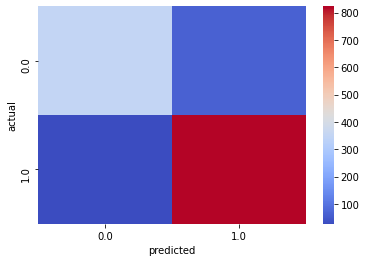

In [ ]:
sns.heatmap(pd.crosstab(ytest,classifier.predict(xtest)),cmap='coolwarm')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
#custom NN
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop,Adam


In [ ]:
print(X.shape)

(4230, 4)


In [ ]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.125, random_state=1)

In [ ]:
model=Sequential() 
model.add(Dense(12,activation='relu',input_shape=(3,),kernel_initializer='he_normal'))
# model.add(Dense(45,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(5,activation='sigmoid'))
# model.add(Dropout(0.2))
model.add(Dense(15,activation='sigmoid'))
model.add(Dense(5,activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dropout(0.2))

# model.add(Dropout(0.2))
# model.add(Dense(90,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(60,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(30,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
# model.add(DropOut(0.2))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 12)                48        
_________________________________________________________________
dense_27 (Dense)             (None, 20)                260       
_________________________________________________________________
dense_28 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_29 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 6         
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(X_train.shape)

(2961, 4)


In [ ]:

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy','AUC'])


history = model.fit(X_train1, y_train1,
                    batch_size=32,
                    epochs=250,
                    verbose=1,
                    validation_data=(X_val, y_val))


Epoch 1/250
103/103 [==============================] - 1s 5ms/step - loss: 0.3476 - accuracy: 0.8488 - auc: 0.8951 - val_loss: 0.3386 - val_accuracy: 0.8613 - val_auc: 0.8965
Epoch 2/250
103/103 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8759 - auc: 0.9077 - val_loss: 0.3515 - val_accuracy: 0.8540 - val_auc: 0.8920
Epoch 3/250
103/103 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8624 - auc: 0.8953 - val_loss: 0.3399 - val_accuracy: 0.8613 - val_auc: 0.8965
Epoch 4/250
103/103 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8623 - auc: 0.9009 - val_loss: 0.3467 - val_accuracy: 0.8589 - val_auc: 0.8898
Epoch 5/250
103/103 [==============================] - 0s 2ms/step - loss: 0.3199 - accuracy: 0.8685 - auc: 0.9095 - val_loss: 0.3378 - val_accuracy: 0.8564 - val_auc: 0.8986
Epoch 6/250
103/103 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8644 - auc: 0.8990 - val_loss

In [ ]:
score = model.evaluate(X_test,y_test, verbose=0)
print(score)
print('Test accuracy:', score[1])

[0.3238428831100464, 0.8686131238937378, 0.8990457057952881]
Test accuracy: 0.8686131238937378


In [ ]:
model.save('geoemtry_wo_height.h5')

In [ ]:
!ls

 409_2020_Assignment_1.pdf	      multimodal1.h5
 ad.data			      multi_modal_1.png
 ad.DOCUMENTATION		      multiModal_1.png
 ad.names			      multi_modal_2.png
 ad.txt				      multiModal_2.png
 Assignment_2			      multimodelmachax_1
 augmented			      multimodelmachax_1.h5
 augmented.txt			      multimodelmachax_2.h5
 auto_model			      multimodelmachax_3.h5
 C4.5				      multimodelmachax_40.h5
'Colab Notebooks'		      multimodelmachax_41.h5
 column_names.csv		      multimodelmachax_4.h5
 complete_data.csv		      nlp_score_3279.csv
'Copy of data.csv'		      nlp_score_synth.csv
 crawl-300d-2M.vec.zip		     'ntj-nzse-rum - Mar 28, 2021.gjam'
 data.csv			      os_lectures-20210308T033926Z-001.zip
 Dataset			      os_lectures-20210308T033926Z-002.zip
 data_without_outliers.csv	      outputs
 DeepLearning.mp4		      pca_data.csv
 dfffff.csv			      Q2.ipynb
 discdatacomp_100.csv		      Q3.ipynb
 discdatacomp_2000.csv		      RPData.csv
 discdatacomp.csv		      Shap_data.csv
 ELL409				  